In [2]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
(x_train,y_train),(x_test,y_test)=keras.datasets.mnist.load_data()

In [4]:
len(x_train)

60000

In [5]:
len(x_test)

10000

In [6]:
x_train[0].shape

(28, 28)

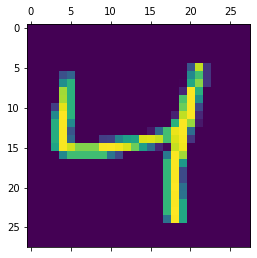

In [7]:
plt.matshow(x_train[2])

In [8]:
y_train[2]

4

In [9]:
x_train=x_train/255
x_test=x_test/255

In [10]:
x_train_flattened = x_train.reshape(len(x_train),28*28)
x_train_flattened.shape

(60000, 784)

In [11]:
x_test_flattened = x_test.reshape(len(x_test),28*28)
x_test_flattened.shape

(10000, 784)

In [16]:
model=keras.Sequential([keras.layers.Dense(10,input_shape=(784,),activation='sigmoid')])

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics='accuracy')

                        

In [17]:

model.fit(x_train_flattened,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4887 - accuracy: 0.8783
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3072 - accuracy: 0.9151
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2857 - accuracy: 0.9208
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2751 - accuracy: 0.9235
Epoch 5/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2679 - accuracy: 0.9263


In [18]:
model.evaluate(x_test_flattened,y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.2682 - accuracy: 0.9255


[0.26823651790618896, 0.9254999756813049]

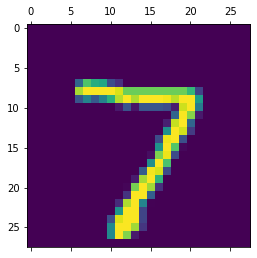

In [20]:
plt.matshow(x_test[0])

In [21]:
y_predicted=model.predict(x_test_flattened)
y_predicted[0]

array([1.6993927e-05, 1.1578945e-10, 2.7970458e-05, 5.7026446e-03,
       1.0151723e-06, 5.7183119e-05, 1.3229430e-09, 7.9295462e-01,
       8.2920378e-05, 7.7503920e-04], dtype=float32)

In [22]:
np.argmax(y_predicted[0])

7

In [23]:
y_predicted_labels=[np.argmax(i) for i in y_predicted]
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [24]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [26]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 958,    0,    1,    1,    0,    5,    9,    3,    3,    0],
       [   0, 1110,    3,    2,    0,    1,    4,    2,   13,    0],
       [   3,    9,  922,   16,    8,    3,   12,   10,   45,    4],
       [   1,    0,   18,  924,    1,   15,    2,   15,   29,    5],
       [   1,    1,    2,    1,  915,    0,   11,    4,   11,   36],
       [   7,    2,    2,   41,   11,  745,   19,   10,   47,    8],
       [   7,    3,    6,    1,    8,    6,  921,    2,    4,    0],
       [   1,    5,   22,    5,    8,    0,    0,  961,    3,   23],
       [   4,    7,    6,   18,    9,   15,   10,   13,  888,    4],
       [   8,    6,    2,   11,   28,    4,    0,   27,   12,  911]])>

Text(69.0, 0.5, 'Truth')

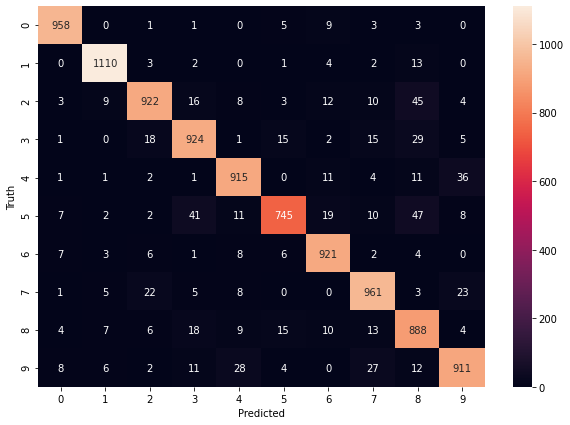

In [29]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [31]:
model=keras.Sequential([
    keras.layers.Dense(200,input_shape=(784,),activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics='accuracy')


model.fit(x_train_flattened,y_train,epochs=5)                        

Epoch 1/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2594 - accuracy: 0.9271
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1087 - accuracy: 0.9674
Epoch 3/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0734 - accuracy: 0.9781
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0554 - accuracy: 0.9828
Epoch 5/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0417 - accuracy: 0.9873


In [32]:
model.evaluate(x_test_flattened,y_test)

313/313 [==============================] - 0s 610us/step - loss: 0.0784 - accuracy: 0.9768


[0.07839889824390411, 0.9768000245094299]

In [39]:
model=keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(200,activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics='accuracy')


model.fit(x_train,y_train,epochs=5)  

Epoch 1/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2618 - accuracy: 0.9267
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1113 - accuracy: 0.9673
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0755 - accuracy: 0.9778
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0549 - accuracy: 0.9833
Epoch 5/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0434 - accuracy: 0.9865
